In [8]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet50 import preprocess_input
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import os
import tensorflow as tf
from sklearn.preprocessing import label_binarize
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

warnings.filterwarnings("ignore")
%matplotlib inline
#os.environ['CUDA_VISIBLE_DEVICES'] = '-1'

model = load_model('../models/bareCNN.keras')
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 256, 256, 16)      448       
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 128, 128, 16)      0         
 ng2D)                                                           
                                                                 
 conv2d_11 (Conv2D)          (None, 128, 128, 32)      4640      
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 64, 64, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_12 (Conv2D)          (None, 64, 64, 64)        18496     
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 32, 32, 64)       

In [3]:
test_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rescale=1./255
)

test_generator = test_datagen.flow_from_directory(
    '../data/splits/test' ,
    target_size=(256, 256), 
    batch_size=32,  
    class_mode='categorical',  
    shuffle=False 
)

Found 400 images belonging to 4 classes.


In [4]:
predictions = model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

2023-12-12 07:20:03.221510: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8907
2023-12-12 07:20:03.256808: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory


 9/13 [===================>..........] - ETA: 0s

2023-12-12 07:20:03.480140: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory


13/13 [==============================] - 1s 32ms/step


In [5]:
report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)

              precision    recall  f1-score   support

     DownDog       0.62      0.71      0.66       100
       Plank       0.69      0.72      0.70       100
        Tree       0.81      0.69      0.75       100
    Warrior2       0.79      0.76      0.78       100

    accuracy                           0.72       400
   macro avg       0.73      0.72      0.72       400
weighted avg       0.73      0.72      0.72       400



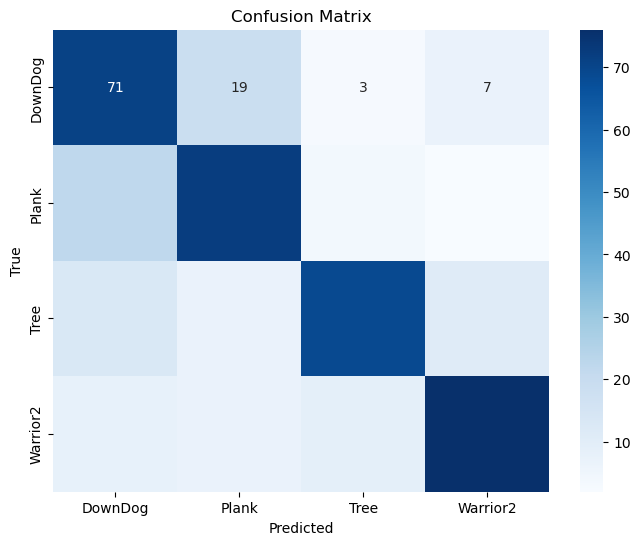

In [6]:
confusion_mtx = confusion_matrix(true_classes, predicted_classes)

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

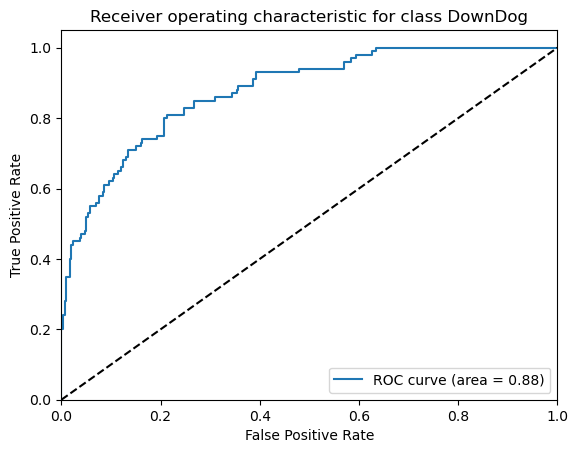

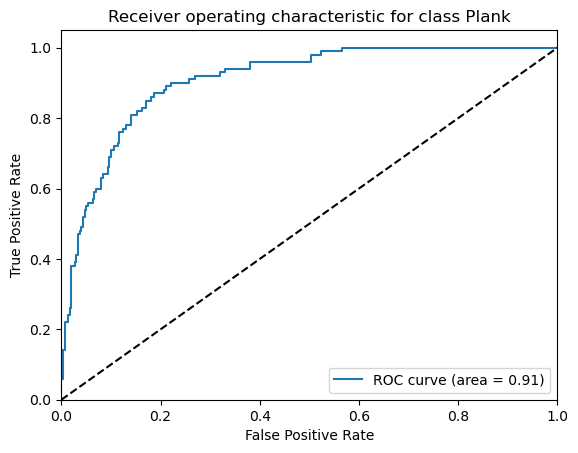

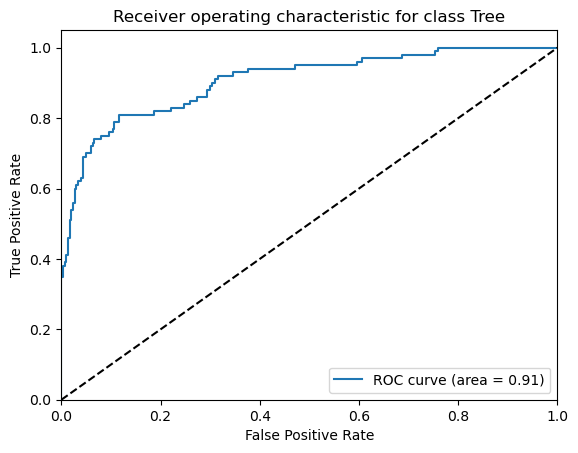

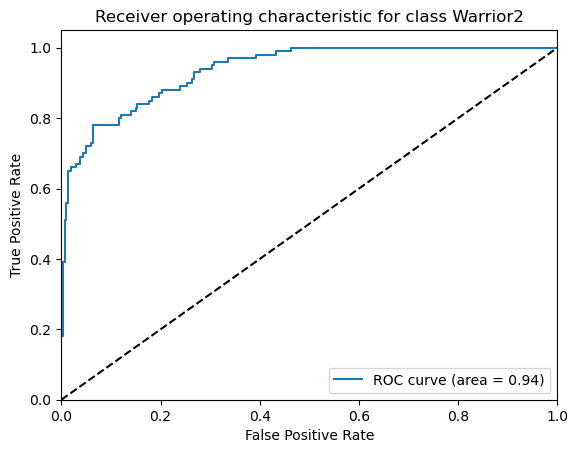

In [7]:
# Binarize the labels
y_bin = label_binarize(true_classes, classes=np.arange(len(class_labels)))

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(class_labels)):
    fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], predictions[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
for i in range(len(class_labels)):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver operating characteristic for class {class_labels[i]}')
    plt.legend(loc="lower right")
    plt.show()